In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path="https://raw.githubusercontent.com/prateekcsit/TSFDP/main/Day%202/diabetes.csv"
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN


In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Unnamed: 9'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Unnamed: 9                0 non-null      float64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [5]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Unnamed: 9  
0                    

In [6]:
data=data.drop(['Unnamed: 9'], axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

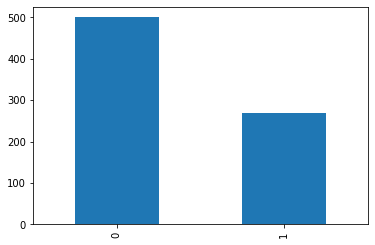

In [8]:
data['Outcome'].value_counts().plot(kind='bar')

In [9]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

# KNN Algo Implementation

## Determine value of k value

In [10]:
y=data['Outcome']
x=data.drop(['Outcome'], axis=1)

In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Model and data splitting

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42, test_size=0.25)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
train_acc=[]
test_acc=[]
for k in range(1,31):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    # getting training time accuracy
    train_acc.append(model.score(x_train, y_train))
    # test time accuracy
    test_acc.append(model.score(x_test, y_test))


In [29]:
train_acc

[1.0,
 0.8385416666666666,
 0.8472222222222222,
 0.8159722222222222,
 0.8072916666666666,
 0.7986111111111112,
 0.7986111111111112,
 0.7864583333333334,
 0.796875,
 0.7916666666666666,
 0.7951388888888888,
 0.7881944444444444,
 0.7899305555555556,
 0.7829861111111112,
 0.7864583333333334,
 0.7864583333333334,
 0.7864583333333334,
 0.7743055555555556,
 0.78125,
 0.7690972222222222,
 0.78125,
 0.7760416666666666,
 0.7829861111111112,
 0.7743055555555556,
 0.7725694444444444,
 0.7690972222222222,
 0.7725694444444444,
 0.765625,
 0.7760416666666666,
 0.765625]

In [30]:
test_acc

[0.6666666666666666,
 0.7083333333333334,
 0.640625,
 0.6927083333333334,
 0.65625,
 0.6927083333333334,
 0.6822916666666666,
 0.7083333333333334,
 0.7135416666666666,
 0.71875,
 0.6927083333333334,
 0.7447916666666666,
 0.7395833333333334,
 0.734375,
 0.7395833333333334,
 0.7291666666666666,
 0.7135416666666666,
 0.7135416666666666,
 0.7135416666666666,
 0.7083333333333334,
 0.703125,
 0.6979166666666666,
 0.6927083333333334,
 0.7083333333333334,
 0.703125,
 0.71875,
 0.7083333333333334,
 0.71875,
 0.7135416666666666,
 0.7239583333333334]

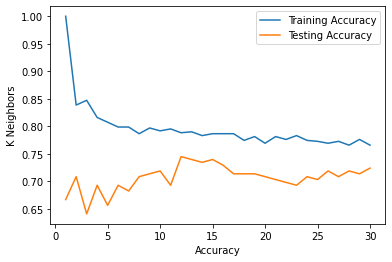

In [31]:
plt.plot(range(1,31), train_acc, label="Training Accuracy")
plt.plot(range(1,31), test_acc, label="Testing Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("K Neighbors")
plt.legend()
plt.savefig("KNN Comparision Model")

In [32]:
knn_model=KNeighborsClassifier(n_neighbors=15)
knn_model.fit(x_train, y_train)
train_accuracy=knn_model.score(x_train, y_train)
test_accuracy=knn_model.score(x_test, y_test)
print("Training Accuracy: ",train_accuracy)
print("Test Accuracy:",test_accuracy)

Training Accuracy:  0.7864583333333334
Test Accuracy: 0.7395833333333334


In [33]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [34]:
d=2,98,125,15,80,28.65,0.289,35
knn_model.predict([d])

C:\Users\sahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)
print("Training Accuracy: ",lr_model.score(x_train, y_train))
print("Test Accuracy: ",lr_model.score(x_test, y_test))

Training Accuracy:  0.7777777777777778
Test Accuracy:  0.7291666666666666


C:\Users\sahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print("Training Accuracy: ",dt_model.score(x_train, y_train))
print("Test Accuracy: ",dt_model.score(x_test, y_test))

Training Accuracy:  1.0
Test Accuracy:  0.6979166666666666


In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train, y_train)
print("Training Accuracy: ",dt_model.score(x_train, y_train))
print("Test Accuracy: ",dt_model.score(x_test, y_test))

Training Accuracy:  0.84375
Test Accuracy:  0.7239583333333334


# MLP Classifier

In [42]:
from sklearn.neural_network import MLPClassifier
nn_model=MLPClassifier()
nn_model.fit(x_train, y_train)
print("Training Accuracy: ",nn_model.score(x_train, y_train))
print("Test Accuracy: ",nn_model.score(x_test, y_test))

Training Accuracy:  0.7916666666666666
Test Accuracy:  0.7083333333333334


C:\Users\sahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

nn_model=MLPClassifier()
nn_model.fit(x_train_scaled, y_train)
print("Training Accuracy: ",nn_model.score(x_train_scaled, y_train))
print("Test Accuracy: ",nn_model.score(x_test_scaled, y_test))

Training Accuracy:  0.8350694444444444
Test Accuracy:  0.7395833333333334


C:\Users\sahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
